# Introducción

Un censo es el procedimiento de adquisición y registro sistemático de información sobre los miembros de una población determinada. El censo es una actividad especial y de amplio alcance, que tiene lugar una vez cada diez años en todo el país. Su finalidad es reunir información sobre la población en general, a fin de presentar un panorama completo y fiable de la población del país: sus condiciones de vivienda y sus características demográficas, sociales y económicas. La información recogida incluye datos sobre edad, sexo, país de origen, estado civil, condiciones de vivienda, matrimonio, educación, empleo, etc. Este dataset muestra datos de 1994.

## Explicación de variables

El conjunto de datos proporciona 15 variables de entrada que son una mezcla de tipos de datos categóricos, ordinales y numéricos. La lista completa de variables es la siguiente:

- age: Edad.
- workclass: Clase de trabajo.
- fnlwgt: Peso final, Los pesos en los archivos de la CPS se controlan con estimaciones independientes de la población civil no institucional de los EE.UU.
- education: Educación.
- educational-num: Número de años de educación.
- marital-status: Estado civil.
- occupation: Ocupación.
- relationship: Relación.
- race: Raza.
- gender: Sexo.
- capital-gain: Ganancia de capital.
- capital-loss: Pérdida de capital.
- hours-per-week: Horas por semana.
- native-country: País de origen.
- income: Ingresos, con dos tipos de ingresos, menos o mas de 50.000$.


# Importar paquetes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import pandas_profiling
import os as os

# Importar dataset

In [3]:
data = pd.read_csv('../data/adult.csv')

In [176]:
data.head(25)

age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831       HS-grad                9   
14   48           Private  279724       HS-grad                9   
15   43           Private  346189       Masters               14   
16   20         State-gov  444554  Some-college               10   
17   43           Private  128354       HS-grad                9   
18   37           Private   60548       HS-grad                9   
19   40           Private   85019     Doctorate               16   
20   34           Private  107914     Bachelors               13   
21   34           Private  238588  Some-college               10   
22   72                 ?  132015       7th-8th                4   
23   25           Private  220931     Bachelors               13   
24   25           Private  205947     Bachelors               13   

        marital-status         occupation   relationship                race  \
0        Never-married  Machine-op-inspct      Own-child               Black   
1   Married-civ-spouse    Farming-fishing        Husband               White   
2   Married-civ-spouse    Protective-serv        Husband               White   
3   Married-civ-spouse  Machine-op-inspct        Husband               Black   
4        Never-married                  ?      Own-child               White   
5        Never-married      Other-service  Not-in-family               White   
6        Never-married                  ?      Unmarried               Black   
7   Married-civ-spouse     Prof-specialty        Husband               White   
8        Never-married      Other-service      Unmarried               White   
9   Married-civ-spouse       Craft-repair        Husband               White   
10  Married-civ-spouse  Machine-op-inspct        Husband               White   
11  Married-civ-spouse       Adm-clerical        Husband               White   
12       Never-married       Adm-clerical  Not-in-family               White   
13  Married-civ-spouse                  ?        Husband               White   
14  Married-civ-spouse  Machine-op-inspct        Husband               White   
15  Married-civ-spouse    Exec-managerial        Husband               White   
16       Never-married      Other-service      Own-child               White   
17  Married-civ-spouse       Adm-clerical           Wife               White   
18             Widowed  Machine-op-inspct      Unmarried               White   
19  Married-civ-spouse     Prof-specialty        Husband  Asian-Pac-Islander   
20  Married-civ-spouse       Tech-support        Husband               White   
21       Never-married      Other-service      Own-child               Black   
22            Divorced                  ?  Not-in-family               White   
23       Never-married     Prof-specialty  Not-in-family               White   
24  Married-civ-spouse     Prof-specialty        Husband               White   

    gender  capital-gain  capital-loss  hours-per-week native-country income  
0     Male             0             0              40  United-States  <=50

Podemos observar como los datos perdidos o nulos en este dataset estan marcado con el valor "?". Estos datos los encontramos en las variables: "workclass", "occupation" y "native-country".

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Observamos el tipo de variables que presenta el dataset.

In [129]:
print('Cantidad de Filas y columnas:',data.shape)
print('Nombre columnas:',data.columns)

Cantidad de Filas y columnas: (48842, 15)
Nombre columnas: Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Podemos observar un total de 15 columnas y 48842 filas.

In [136]:
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Comprobación de datos unicos por variables en nuestro dataset. Podemos descargar la variable "race", que muestra la raza de los individuos. A continuación comprobaremos sus variantes. 

In [137]:
data.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

Dentro de la variable "race" encontramos los valores: 'Black', 'White', 'Asian-Pac-Islander', 'Other','Amer-Indian-Eskimo'. Un total de 5 razas distintas.

# Limpieza de datos

Comprobación de datos nulos.

In [138]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Como hemos podido observar nos encontramos con 0 datos nulos, hay que tener en cuenta que en el dataset los datos nulos se encuentras con el valor "?", en nuestro caso, vamos a proceder a hacer el cambio de estos valores a los mas usados en su variable, con el fin de que no interfieran en el estudio.

In [140]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
valoresmasusados = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = valoresmasusados

attrib, counts = np.unique(data['occupation'], return_counts = True)
valoresmasusados = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = valoresmasusados

attrib, counts = np.unique(data['native-country'], return_counts = True)
valoresmasusados = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = valoresmasusados

Se han sustituidos los valores nulos o perdidos en las columnas de "workclass", "occupation" y "native-country" por los valores más frecuentados en su variable. A continuación vamos a comprobar si las modificaciones han sido correctas.

In [142]:
data.head(25)

age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18           Private  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29           Private  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58           Private  299831       HS-grad                9   
14   48           Private  279724       HS-grad                9   
15   43           Private  346189       Masters               14   
16   20         State-gov  444554  Some-college               10   
17   43           Private  128354       HS-grad                9   
18   37           Private   60548       HS-grad                9   
19   40           Private   85019     Doctorate               16   
20   34           Private  107914     Bachelors               13   
21   34           Private  238588  Some-college               10   
22   72           Private  132015       7th-8th                4   
23   25           Private  220931     Bachelors               13   
24   25           Private  205947     Bachelors               13   

        marital-status         occupation   relationship                race  \
0        Never-married  Machine-op-inspct      Own-child               Black   
1   Married-civ-spouse    Farming-fishing        Husband               White   
2   Married-civ-spouse    Protective-serv        Husband               White   
3   Married-civ-spouse  Machine-op-inspct        Husband               Black   
4        Never-married     Prof-specialty      Own-child               White   
5        Never-married      Other-service  Not-in-family               White   
6        Never-married     Prof-specialty      Unmarried               Black   
7   Married-civ-spouse     Prof-specialty        Husband               White   
8        Never-married      Other-service      Unmarried               White   
9   Married-civ-spouse       Craft-repair        Husband               White   
10  Married-civ-spouse  Machine-op-inspct        Husband               White   
11  Married-civ-spouse       Adm-clerical        Husband               White   
12       Never-married       Adm-clerical  Not-in-family               White   
13  Married-civ-spouse     Prof-specialty        Husband               White   
14  Married-civ-spouse  Machine-op-inspct        Husband               White   
15  Married-civ-spouse    Exec-managerial        Husband               White   
16       Never-married      Other-service      Own-child               White   
17  Married-civ-spouse       Adm-clerical           Wife               White   
18             Widowed  Machine-op-inspct      Unmarried               White   
19  Married-civ-spouse     Prof-specialty        Husband  Asian-Pac-Islander   
20  Married-civ-spouse       Tech-support        Husband               White   
21       Never-married      Other-service      Own-child               Black   
22            Divorced     Prof-specialty  Not-in-family               White   
23       Never-married     Prof-specialty  Not-in-family               White   
24  Married-civ-spouse     Prof-specialty        Husband               White   

    gender  capital-gain  capital-loss  hours-per-week native-country income  
0     Male             0             0              40  United-States  <=50

El método describe devuelve información estadística de los datos del dataframe o de la serie (de hecho, este método devuelve un dataframe). Esta información incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

In [146]:
data.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

Como puntos a destacar podemos observar una media de edad en el dataset de 39 años. 

# Análisis Gráfico

El mapa de calor es una forma de representar los datos en una forma bidimensional. Los valores de los datos son representados como colores en el gráfico. La meta del mapa de calor es proporcionar un resumen visual a color de la información.

<AxesSubplot:>

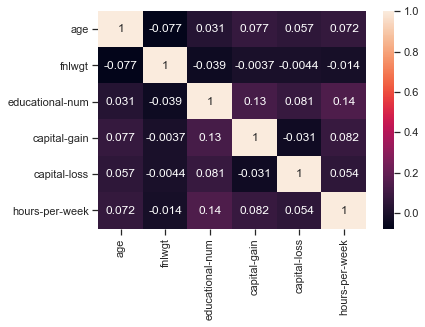

In [149]:
corr = data.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,
               annot=True)

Se aprecia una baja relación entre todas las variables, teniendo importancia la relación entre el nivel de estudios con el capital ganado y las horas trabajadas a la semana.

De forma predeterminada, esta función creará una cuadrícula de ejes de manera que cada variable numérica  compartirá entre los ejes y en una sola fila y los ejes x en una sola columna. Las gráficas diagonales se tratan de manera diferente: se dibuja una gráfica de distribución univariante para mostrar la distribución marginal de los datos en cada columna.

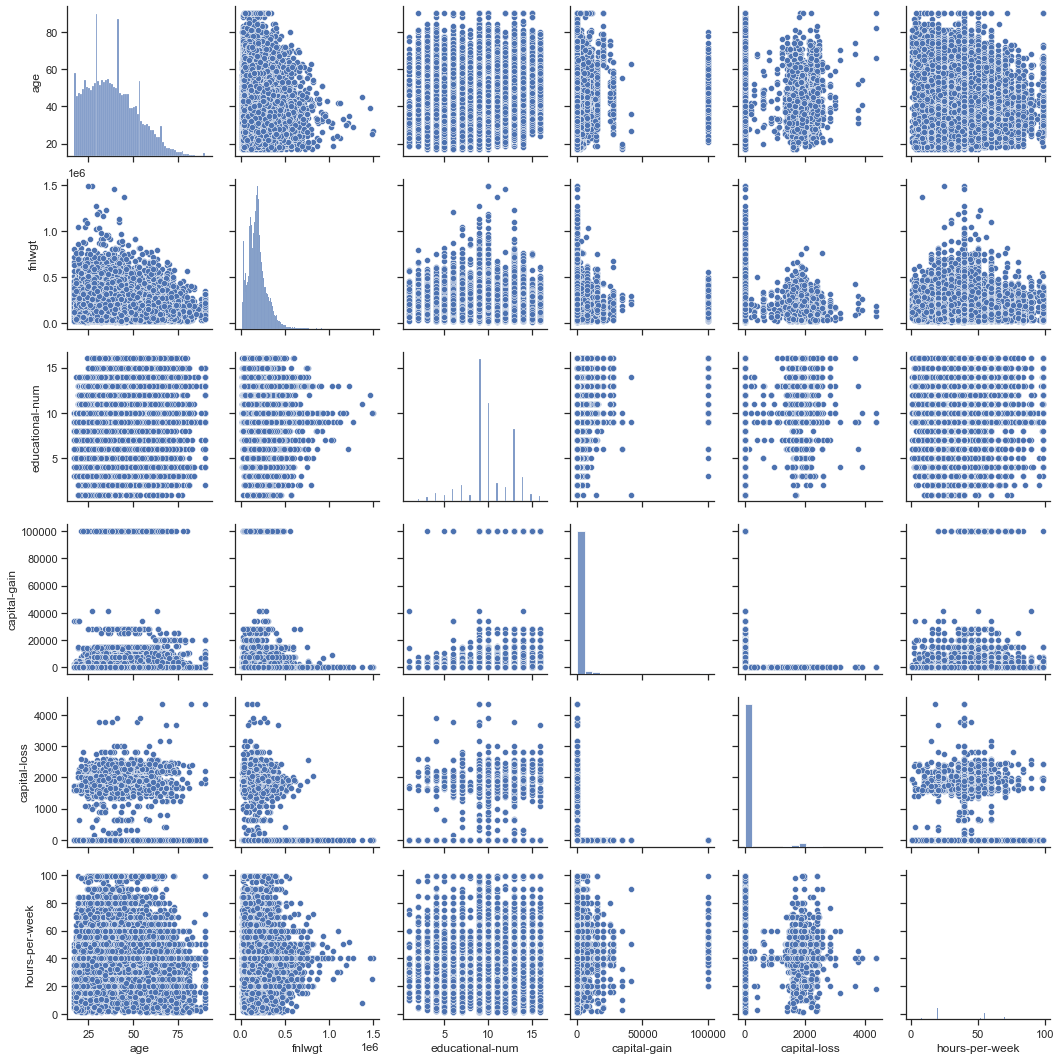

In [97]:
sns.pairplot(data)

En el siguiente g´rafico, se observa la distribución de la variable estado civil. Presenta 6 categorías, el marido tiene el porcentaje máximo (40,37%) entre todas las categorías, seguido de los no familiares (25,76%).

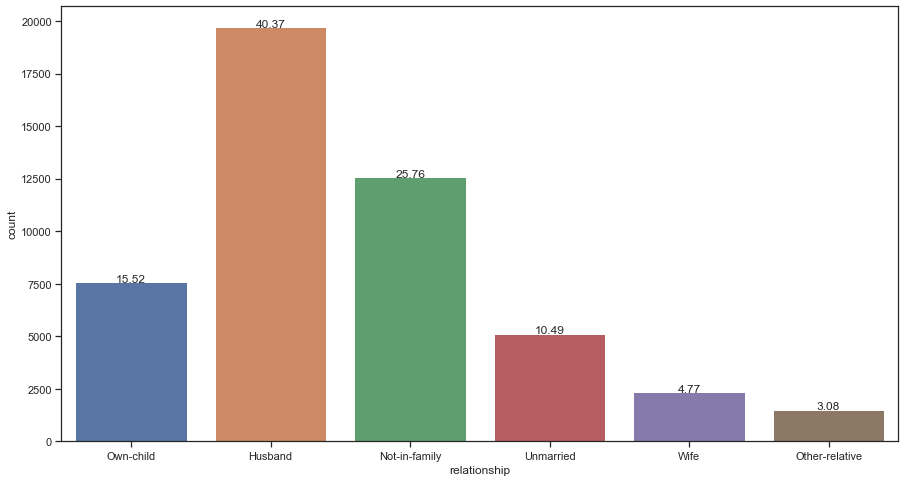

In [150]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Así mismo, se representa como se distribuye la edad de nuestro dataset, estando la mayor parte de los datos en menos de 50 años de edad.

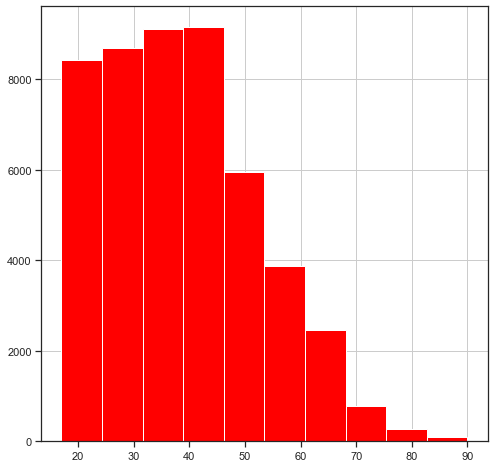

In [151]:
data['age'].hist(figsize=(8,8), color = "red")
plt.show()

In [111]:
data[data["age"]>50].shape

(9808, 14)

In [112]:
data[data["age"]<50].shape

(38168, 14)

Concretamente tenemos 38168 observaciones con edad menor de 50 años, mientras que el resto ( 9808 observaciones) se encuentran por encima de 50 años de edad.

En el caso de horas por semana trabajadas, refleja el siguiente histograma.

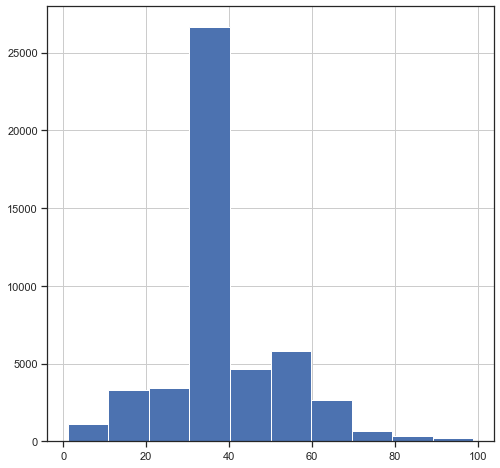

In [152]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()


Dónde la mayor cantidad de horas trabajadas se encuetean en el intervalo de 30 a 40 años de edad.

A continuación mostramos histogramas de frecuencia sobre el capital ganado y perdido. Encontrándose ambos en la primera parte del gráfico.

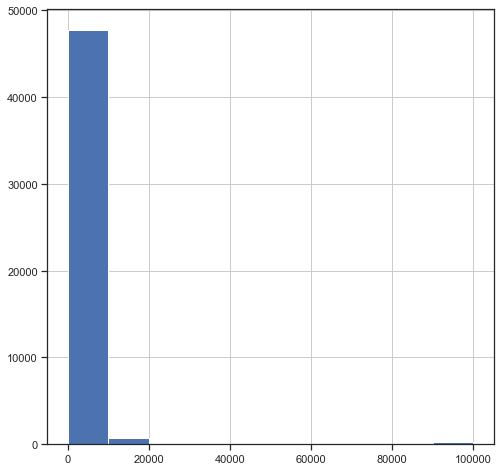

In [155]:
data["capital-gain"].hist(figsize=(8,8))
plt.show()

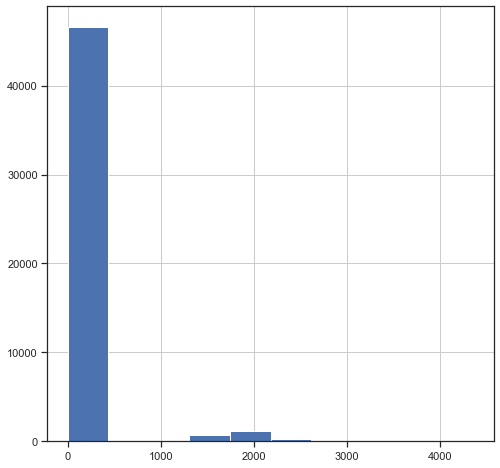

In [156]:
data["capital-loss"].hist(figsize=(8,8))
plt.show()

Por ende, incluimos ambas variables en un mismo gráfico de puntos, con el fin de facilitar las observaciones.

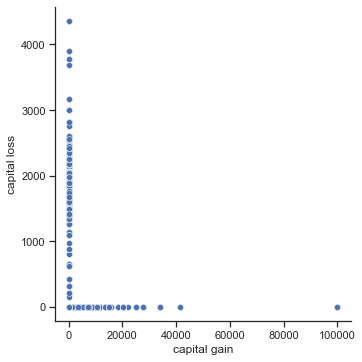

In [157]:
sns.relplot('capital-gain','capital-loss', data= data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Como último estudio gráfico, se refleja la relación de ingresos (más o menos de 50.000$) con la edad. 

<AxesSubplot:xlabel='age', ylabel='Density'>

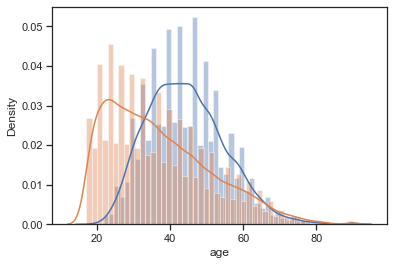

In [159]:
sns.distplot(data[data['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(data[data['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

Se aprecia en color azul los ingresos superiores a 50k, mientras en color naranja menores a 50k. En las edades más jóvenes, como es de esperar, los ingresos son menores, mientras que a medida que aumenta la edad, aumenta el ingreso. 

Como punto final, se ha generado un informe de perfil. “Pandas Profiling” crea reportes de perfil a partir de un Pandas Dataframe, con la finalidad de observar con mayor facilidad los datos. 

In [100]:
data.profile_report()